# Домашня робота №7

# Перетворення випадкових величин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

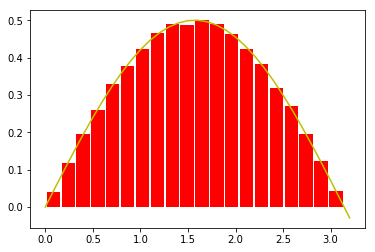

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

f = uniform(-0.5, 1)

a = 1/2 # a, we searched for. (result of integrating)
def func(y):
    return np.arcsin(y / a) + np.pi / 2

x = np.arange(0, np.pi + 0.1, 0.1)
 
plt.plot(x, a * np.sin(x), 'y')
b = func(f.rvs(size=100000))
plt.hist(b, density=True, rwidth=0.9, bins=20, color = 'red')
plt.show()

### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

/home/juliiam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/juliiam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


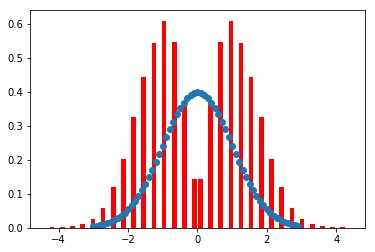

In [83]:
from scipy.stats import norm
def func(x):
    return (-2*np.log((2*np.pi)**(1/2) * x))**(1/2)
    
def _nan(data):
    l = []
    for i in data:
        if not np.isnan(i):
            l.append(i)
    return l
    
x = np.arange(-3, 3, 0.1)
f = (2*np.pi)**(-0.5)*np.exp(-(x**2)/2)
plt.plot(x, f, 'o')
a = norm.rvs(size=100000)
d = list(map(func,a))
d = _nan(data)
plt.hist([d,-np.array(data)],color = ['r','r'], density=True, rwidth=0.9, bins=30)
plt.show()
 


## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

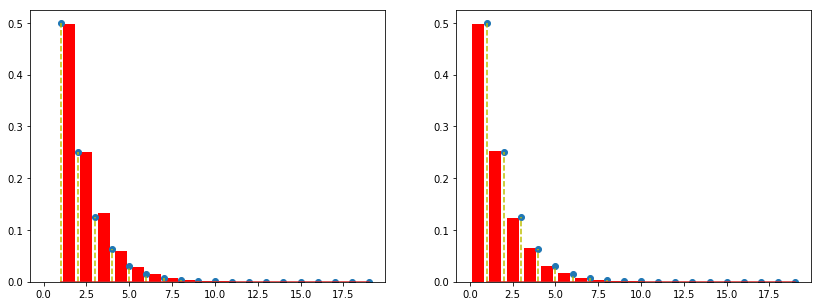

In [33]:
from scipy.stats import geom


a = geom(0.5)
d = plt.gcf()
d.set_size_inches(14, 5)


b = a.rvs(size = 10000) - 1
    
   
    
x = np.arange(1, 20,1) 
a1 = a.rvs(size=10000)
   
plt.subplot(121)
a1 = a.rvs(size=10000)
plt.stem(x, a.pmf(x), 'y--')
plt.hist(a1, density=True, rwidth=0.7, bins=range(15), color = 'red')
    
plt.subplot(122)
plt.stem(x, a.pmf(x), 'y--')
plt.hist(b, density=True, rwidth=0.7, bins=range(15), color = 'red')
plt.show()



## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

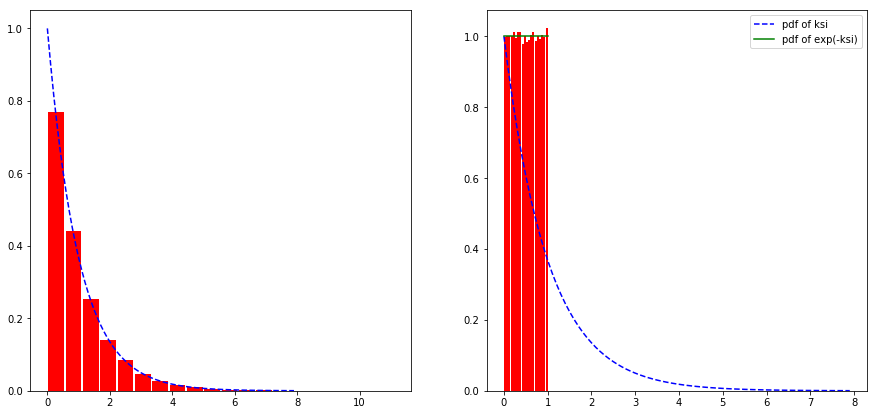

In [52]:
from scipy.stats import expon

e = expon()

a = e.rvs(10000)
x = np.arange(0, 8, 0.1)
f = plt.gcf()
f.set_size_inches(15, 7)

plt.subplot(121)
plt.hist(a, bins=20, density=True, rwidth=0.9, color = 'red')
plt.plot(x, e.pdf(x), 'b--')

plt.subplot(122)
plt.hist(np.exp(-random), bins=20, density=True, rwidth=0.9,color = 'red')
plt.plot(x, e.pdf(x), 'b--', label='pdf of ksi')
plt.plot(np.arange(0, 2), [1, 1],'g', label='pdf of exp(-ksi)')
plt.legend(loc='best')

plt.show()


### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

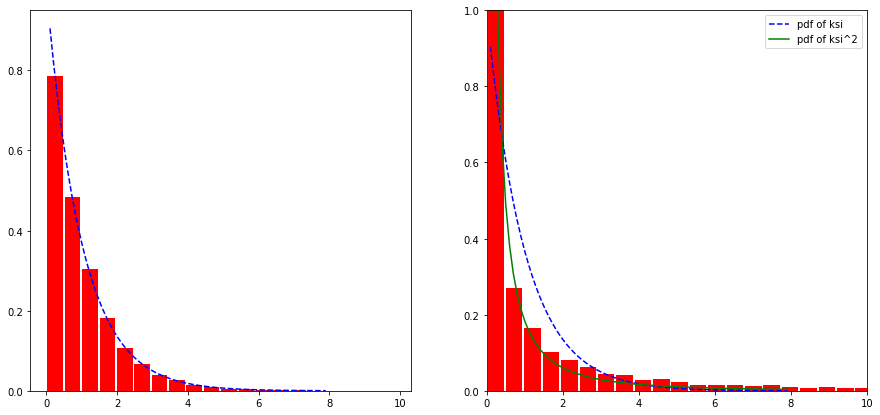

In [55]:
e = expon()

a1 = e.rvs(10000)
x = np.arange(0.1, 8, 0.1)
f = plt.gcf()
f.set_size_inches(15, 7)


plt.subplot(121)
plt.hist(a1, bins=20, density=True, rwidth=0.9, color = 'red')
plt.plot(x, e.pdf(x), 'b--')


plt.subplot(122)
plt.hist(a1 ** 2, bins=200, density=True, rwidth=0.9, color = 'red')
plt.plot(x, e.pdf(x), 'b--', label='pdf of ksi')
plt.plot(x, np.exp(-np.sqrt(x)) / (2 * x),'g', label='pdf of ksi^2')
plt.axis([0,10,0,1])

plt.legend(loc='best')
plt.show()

 

## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

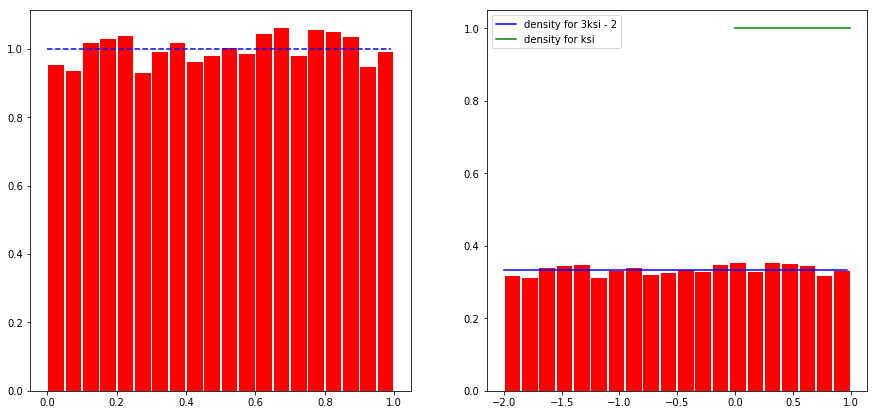

In [57]:
f = plt.gcf()
f.set_size_inches(15, 7)

a = uniform(0, 1)
n = 10000
b = a.rvs(n)
x = np.arange(0, 1, 0.01)


plt.subplot(121)
plt.hist(b, bins=20, density=True, rwidth=0.9,color = 'red')
plt.plot(x, a.pdf(x), 'b--')

plt.subplot(122)
plt.hist(3*b - 2, bins=20, density=True, rwidth=0.9, color = 'red')
plt.plot(3*x - 2, a.pdf((x + 2) / 3) / 3, 'b', label='density for 3ksi - 2')
plt.plot(x, a.pdf(x),'g', label='density for ksi')
plt.legend(loc='best')

plt.show()

### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

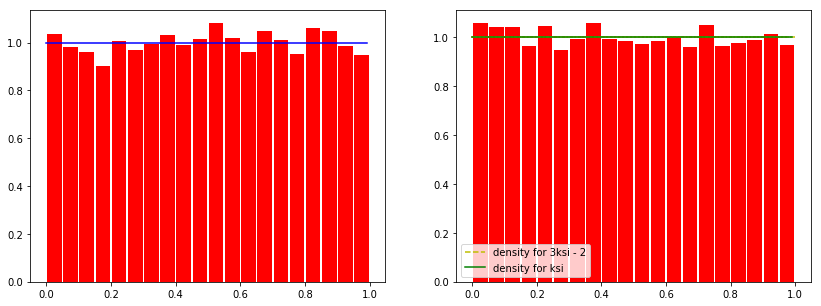

In [58]:
f = plt.gcf()
f.set_size_inches(14, 5)
b = uniform(0, 1)
n = 10000
a = b.rvs(n)

 
plt.subplot(121)
plt.hist(a, density=True, rwidth=0.9, bins=20, color = 'red')
plt.plot(x, b.pdf(x), 'b')

plt.subplot(122)
plt.hist(abs(2*a - 1), density=True, rwidth=0.9, bins=20, color = 'red')
plt.plot(np.abs(2*x - 1), b.pdf((x + 1) / 2) + b.pdf(-(x + 1) / 2), 'y--', label='density for 3ksi - 2')


plt.plot(x, [1]*len(x),'g', label='density for ksi')
plt.legend(loc='best')

plt.show()
 

### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

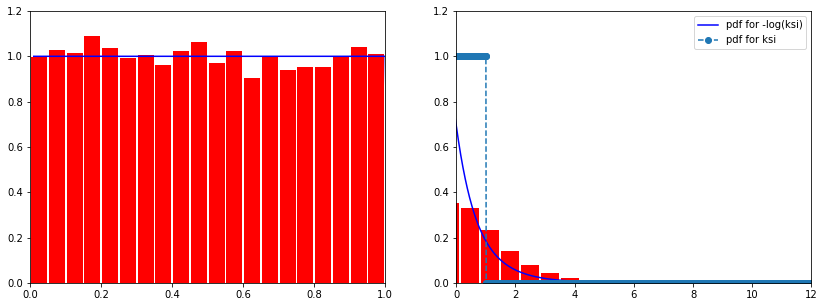

In [60]:
f = plt.gcf()
f.set_size_inches(14, 5)
a = uniform(0, 1)

b = a.rvs(10000)
x = np.arange(0.01, 12, 0.01)

plt.subplot(121)
plt.hist(b, bins=20, density=True, rwidth=0.9, color ='red')
plt.plot(x,a.pdf(x), 'b')
plt.axis([0,1,0,1.2])
 

plt.subplot(122)
plt.hist(-np.log(random), bins=20, density=True, rwidth=0.9, color = 'red')
plt.plot(-np.log(x), x * rv.pdf(np.exp(-x)), 'b', label='pdf for -log(ksi)')
plt.plot(x, a.pdf(x), 'o--', label='pdf for ksi')
plt.axis([0,12,0,1.2])
 
 
plt.legend(loc='best')
plt.show()


## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [39]:
def func(size=1):
    return tuple(zip(uniform(0, 1).rvs(size=size), uniform(0, 1).rvs(size=size)))


Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

/home/juliiam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app
/home/juliiam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app
/home/juliiam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/home/juliiam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app


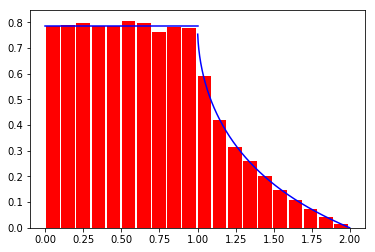

In [72]:
from scipy.stats import uniform

def func(size=1):
    return tuple(zip(uniform(0, 1).rvs(size=size), uniform(0, 1).rvs(size=size)))

k = func(size = 100000)

ks = []
for i in range(len(k)):
    ks.append(k[i][0]**2 + k[i][1]**2)
x1= np.arange(0,2, 0.001)
x2 = np.arange(0, 1.5, 0.5)

plt.hist(ks, density=True, rwidth=0.9, bins=20,color = 'red')
plt.plot(x1 np.pi/4 - np.arccos(x**(-0.5)) -0.5*(x-1)**(-0.5) + 0.5*(x-1)**(-0.5), 'b', x2, [np.pi/4]*len(x2), 'b')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

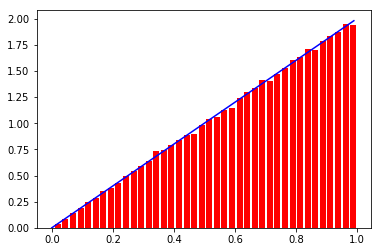

In [64]:
ks1 = []
for i in range(len(k)):
    ks1.append(max(k[i][0], k[i][1]))
 
plt.hist(ks1, density=True, rwidth=0.8, bins=40,color = 'red')
x = np.arange(0, 1, 0.01)
plt.plot(x, 2*x, 'b')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

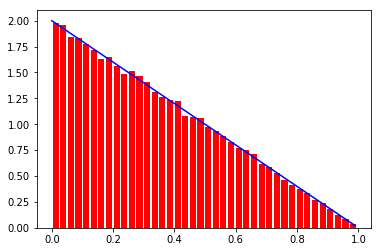

In [66]:
ks2 = []
for i in range(len(k)):
    ks2.append(abs(k[i][0] - k[i][1]))
 
plt.hist(ks2, density=True, rwidth=0.8, bins=40, color = 'red')
x = np.arange(0, 1, 0.01)
plt.plot(x, -2*x + 2, 'b')
plt.show()
